In [1]:
# import stuff
#General
import importlib

#My Code
import io_manager as io
import plot_moments
from pars_shocks import Pars
import my_toolbox as tb
import tables
import main
import numpy as np
import model_uncert as model
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import pars_shocks as ps

import time
import main
import importlib
importlib.reload(main)

importlib.reload(tb)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/MH_trans/"
out_path = main_path + "trans_output_test/"
myPars = Pars(main_path, J=51, sim_draws=10000)


In [2]:
trans_name = "MH_trans_by_MH_clust_k2_age"
dis_trans_path = trans_path + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_full(myPars, dis_trans_path)
plot_moments.plot_H_trans_H_type(myPars, out_path, trans_name) 

trans_name = "MH_trans_by_MH_clust_50p_age"
dis_trans_path = trans_path + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_full(myPars, dis_trans_path)
plot_moments.plot_H_trans_H_type(myPars, out_path, trans_name) 


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Age', ylabel='Probability (%)'>)

In [3]:
trans_name = "MH_trans_uncond_age"
dis_trans_path = trans_path + trans_name + ".csv" 
my_trans = io.read_and_shape_H_trans_uncond_age(myPars, dis_trans_path)
# print(my_trans)
myPars.H_trans = my_trans
# print(myPars.H_trans)
plot_moments.plot_H_trans_uncond(myPars, out_path, trans_name) 

In [4]:
trans_name = "MH_trans_uncond"
dis_trans_path = trans_path + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_uncond(myPars, dis_trans_path)
trans= myPars.H_trans[0,0,:,:]
tables.print_H_trans_to_tex(myPars, trans, out_path, trans_name)


PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/trans_output_test/MH_trans_uncond.pdf


In [5]:
r2_path = trans_path + "MH_type_reg_r2.csv"
my_r2_mat = tb.read_matrix_from_csv(r2_path, column_index = 0)
print(my_r2_mat)
tables.table_r2_by_type_alg(myPars, my_r2_mat, out_path, "tab_MH_type_reg_r2")

[[0.36685738 0.36612839 0.41335493 0.4533889  0.47387725        nan]
 [0.37544212 0.37779707 0.42311203 0.45883521 0.47890586 0.07205222]]
PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/trans_output_test/tab_MH_type_reg_r2


In [6]:

trans_name = "MH_trans_by_MH_clust_50p"
dis_trans_path = trans_path + trans_name + ".csv" 
trans_50p = tb.read_matrix_from_csv(dis_trans_path, column_index = 0).reshape(2,2,2)
# print(trans_50p)

trans_name = "MH_trans_by_MH_clust_k2"
dis_trans_path = trans_path + trans_name + ".csv" 
trans_k2 = tb.read_matrix_from_csv(dis_trans_path, column_index=0).reshape(2,2,2)
# print(trans_k2)

tables.table_H_trans_by_type_alg(myPars, trans_50p, trans_k2, out_path)

PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/trans_output_test/H_trans_by_type_alg_test.pdf


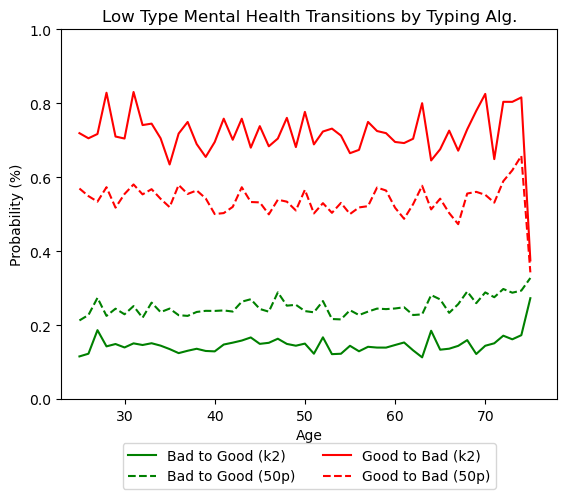

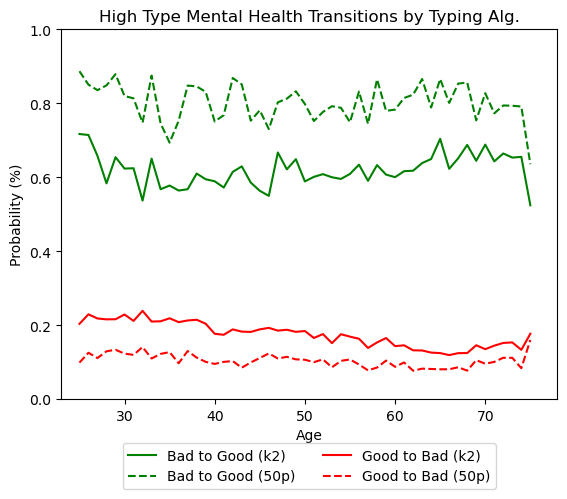

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Low Type Mental Health Transitions by Typing Alg.'}, xlabel='Age', ylabel='Probability (%)'>,
 <Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'High Type Mental Health Transitions by Typing Alg.'}, xlabel='Age', ylabel='Probability (%)'>)

In [7]:
trans_name = "MH_trans_by_MH_clust_k2_age"
dis_trans_path = trans_path + trans_name + ".csv" 
H_trans1 = io.read_and_shape_H_trans_full(myPars, dis_trans_path)

trans_name = "MH_trans_by_MH_clust_50p_age"
dis_trans_path = trans_path + trans_name + ".csv" 
H_trans2 = io.read_and_shape_H_trans_full(myPars, dis_trans_path)

myPars1 = Pars(main_path, J=51, H_trans=H_trans1)
myPars2 = Pars(main_path, J=51, H_trans=H_trans2)

plot_moments.plot_H_trans_H_type_alg(myPars1, myPars2, path=out_path)

In [8]:
import calibration
importlib.reload(calibration)
importlib.reload(main)
#run stuff here
print("Running main")
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"

# trans_path = main_path + "input/MH_trans/MH_trans_by_MH_clust_k2_age.csv"
trans_path = main_path + "input/k-means/MH_trans_by_MH_clust_age.csv"
# of_name = "output"
of_name = None
myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path)


Running main
*****Running main_io with default out_folder_name*****
intial wage coeff grid [[ 2.30258509  1.         -0.02        0.        ]
 [ 2.7080502   1.         -0.02        0.        ]
 [ 2.99573227  1.         -0.02        0.        ]
 [ 3.21887582  1.         -0.02        0.        ]]
Creating myShocks in main_io
Age 25 health transitions:
[[[0.88466465 0.11533532]
  [0.71933562 0.28066435]]

 [[0.28294072 0.71705925]
  [0.20348099 0.79651898]]]
Solver ran in 10.969311699998798 seconds
Calibrating with alpha_lab_targ = 0.30498119901960785, w0_mean_targ = 12.664071, w0_sd_targ = 3.1353517, w1_targ = 0.25679965942280614, w2_targ = 0.2029180155568051, wH_targ = 0.028003097
Calibration iteration 0
Calibration iteration 1
Calibration iteration 2
Calibration iteration 3
Calibration iteration 4
Calibration iteration 5
Calibration iteration 6
Calibration iteration 7
Calibration iteration 8
Calibration iteration 9
Calibration converged after 10 iterations
w0_weights = [5.51253353e-01 

In [9]:


def plot_var_log_earn(myPars: Pars, sims: Dict[str,np.ndarray], out_path: str, quietly = False) -> Tuple[Figure, Axes]:
    earnings_sim = sims["lab_earnings"][:myPars.J]
    print("earnings_sim.shape", earnings_sim.shape)
    print("earnings_sim type", type(earnings_sim))
    log_earnings= np.log(earnings_sim, where=earnings_sim>0)
    var_log_earnings_by_age = weighted_var_sim_by_age(log_earnings)
    # var_log_earnings_by_age = weighted_var_sim_by_age(earnings_sim)
    fig, ax = plot_lc_mom_by_age(var_log_earnings_by_age, myPars.age_grid, out_path, "Variance of Log Earnings", quietly)
    return fig, ax

def weighted_var_sim_by_age(sim_lc: np.ndarray) -> np.ndarray:
    weighted_mean_by_age = np.sum(model.gen_weighted_sim(myPars, sim_lc), axis=tuple(range(sim_lc.ndim-1)))
    deviations = sim_lc - weighted_mean_by_age
    print("deviations.shape", deviations.shape)
    weighted_var_by_age = np.sum(model.gen_weighted_sim(myPars, (sim_lc - weighted_mean_by_age)**2), axis=tuple(range(sim_lc.ndim-1)))
    return weighted_var_by_age

def plot_lc_mom_by_age(lc_mom_by_age: np.ndarray, age_grid: np.ndarray, out_path: str, mom_name: str, quietly: bool = False) -> Tuple[Figure, Axes]:
    values = lc_mom_by_age[:myPars.J]
    age_grid = age_grid[:myPars.J]
    # print("values.shape", lc_mom_by_age.shape)
    # print("age_grid.shape", age_grid.shape)
    y_label = mom_name
    key_label = mom_name
    x_label = "Age"

    fig, ax = plt.subplots()
    ax.plot(age_grid, values, label = key_label)
    ax.set_xlabel(x_label)
    ax.set_xlim([age_grid[0] - 2, age_grid[-1] + 2])
    ax.set_ylabel(y_label)
    ax.legend()
    if not quietly:
        plt.show()
    plt.close()

    return fig, ax

def wperc_lab_earn_by_age(myPars: Pars, sims: Dict[str,np.ndarray], pecentile: float) -> np.ndarray:
    sim_lc = sims["lab_earnings"][:myPars.J]
    sim_lc = np.log(sim_lc, where=sim_lc>0)
    perc_sim_by_age = wperc_sim_by_age(myPars, sim_lc, pecentile)
    return perc_sim_by_age


def wperc_sim_by_age(myPars: Pars, sim_lc: np.ndarray, pecentile: float) -> np.ndarray:
    weight0 = myPars.lab_fe_weights
    weight1 = myPars.H_type_perm_weights
    weight2 = np.ones(myPars.sim_draws) #/myPars.sim_draws
    # weight3 = np.ones(myPars.J)/myPars.J

    # Reshape weights to fit into the 3D array
    weight0_reshaped = weight0[:, np.newaxis, np.newaxis]  # Shape: (lab_fe_grid_size, 1, 1)
    weight1_reshaped = weight1[np.newaxis, :, np.newaxis]  # Shape: (1, H_type_perm_grid_size, 1)
    weight2_reshaped = weight2[np.newaxis, np.newaxis, :]  # Shape: (1, 1, sim_draws)

    # Combine weights
    combined_weights = weight0_reshaped * weight1_reshaped * weight2_reshaped
    perc_sim_by_age = tb.collapse_to_last_dim_wperc(sim_lc, combined_weights, pecentile)
    return perc_sim_by_age

def plot_lab_earn_perc(myPars: Pars, sims: Dict[str,np.ndarray], out_path: str, quietly: bool = False) -> Tuple[Figure, Axes]:
    """
    plots the 10th, 50th, and 90th percentiles and their ratios of log labor earnings by age.
    returns fig_90, ax_90, fig_50, ax_50, fig_10, ax_10, fig_90_10, ax_90_10, fig_90_50, ax_90_50, fig_50_10, ax_50_10
    
    """
    lab_earn_age_90p = wperc_lab_earn_by_age(myPars, sims, 90)
    if not quietly:
        print("Log Labor Earnings 90th Percentile by Age")
        print(lab_earn_age_90p)

    lab_earn_age_50p = wperc_lab_earn_by_age(myPars, sims, 50)
    if not quietly:
        print("Log Labor Earnings 50th Percentile by Age")
        print(lab_earn_age_50p)

    lab_earn_age_10p = wperc_lab_earn_by_age(myPars, sims, 10)
    if not quietly:
        print("Log Labor Earnings 10th Percentile by Age")
        print(lab_earn_age_10p)
    
    lab_earn_by_age_5p = wperc_lab_earn_by_age(myPars, sims, 5)
    if not quietly:
        print("Log Labor Earnings 5th Percentile by Age")
        print(lab_earn_by_age_5p)

    lab_earn_age_90_10_ratio = lab_earn_age_90p/lab_earn_age_10p
    if not quietly:
        print("Log Labor Earnings 90th/10th Percentile Ratio by Age")
        print(lab_earn_age_90_10_ratio)

    lab_earn_age_90_50_ratio = lab_earn_age_90p/lab_earn_age_50p
    if not quietly:
        print("Log Labor Earnings 90th/50th Percentile Ratio by Age")
        print(lab_earn_age_90_50_ratio)

    lab_earn_age_50_10_ratio = lab_earn_age_50p/lab_earn_age_10p
    if not quietly:
        print("Log Labor Earnings 50th/10th Percentile Ratio by Age")
        print(lab_earn_age_50_10_ratio)
    
    lab_earn_age_90_5_ratio = lab_earn_age_90p/lab_earn_by_age_5p
    if not quietly:
        print("Log Labor Earnings 90th/5th Percentile Ratio by Age")
        print(lab_earn_age_90_5_ratio)
    
    lab_earn_age_50_5_ratio = lab_earn_age_50p/lab_earn_by_age_5p
    if not quietly:
        print("Log Labor Earnings 50th/5th Percentile Ratio by Age")
        print(lab_earn_age_50_5_ratio)

    fig_90, ax_90 = plot_lc_mom_by_age(lab_earn_age_90p, myPars.age_grid, out_path, "90th Percentile of Log  Labor Earnings", quietly)
    fig_50, ax_50 = plot_lc_mom_by_age(lab_earn_age_50p, myPars.age_grid, out_path, "50th Percentile of Log Labor Earnings", quietly)
    fig_10, ax_10 = plot_lc_mom_by_age(lab_earn_age_10p, myPars.age_grid, out_path, "10th Percentile of Log Labor Earnings", quietly)
    fig_5, ax_5 = plot_lc_mom_by_age(lab_earn_by_age_5p, myPars.age_grid, out_path, "5th Percentile of Log Labor Earnings", quietly)
    fig_90_10, ax_90_10= plot_lc_mom_by_age(lab_earn_age_90_10_ratio, myPars.age_grid, out_path, "90th/10th Percentile Ratio of Log  Labor Earnings", quietly)
    fig_90_50, ax_90_50 = plot_lc_mom_by_age(lab_earn_age_90_50_ratio, myPars.age_grid, out_path, "90th/50th Percentile Ratio of Log Labor Earnings", quietly)
    fig_50_10, ax_50_10 = plot_lc_mom_by_age(lab_earn_age_50_10_ratio, myPars.age_grid, out_path, "50th/10th Percentile Ratio of Log Labor Earnings", quietly)
    fig_90_5, ax_90_5 = plot_lc_mom_by_age(lab_earn_age_90_5_ratio, myPars.age_grid, out_path, "90th/5th Percentile Ratio of Log Labor Earnings", quietly)
    fig_50_5, ax_50_5 = plot_lc_mom_by_age(lab_earn_age_50_5_ratio, myPars.age_grid, out_path, "50th/5th Percentile Ratio of Log Labor Earnings", quietly)
    

    return fig_90, ax_90, fig_50, ax_50, fig_10, ax_10, fig_5, ax_5, fig_90_10, ax_90_10, fig_90_50, ax_90_50, fig_50_10, ax_50_10, fig_90_5, ax_90_5, fig_50_5, ax_50_5



    

In [20]:
# import calibration
import pars_shocks as ps
# importlib.reload(calibration)
# importlib.reload(main)
# importlib.reload(ps)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/k-means/MH_trans_by_MH_clust_age.csv"
of_name = None
myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path, output_flag = False)

# myPars_no_cost = ps.copy_pars_instance(myPars_bench)
myPars_no_cost, myShocks_no_cost, sols_no_cost, sims_no_cost = main.main_io(main_path, myPars = myPars_no_cost, myShocks=myShocks_bench, 
                                                                            out_folder_name = of_name, H_trans_path = trans_path,  output_flag = False)
myPars_no_cost.phi_H = 0.0

myPars_no_wH = ps.copy_pars_instance(myPars_bench)
myPars_no_wH.wH_coeff = 0.0
myPars_no_wH, myShocks_no_wH, sols_no_wH, sims_no_wH = main.main_io(main_path, myPars = myPars_no_wH, out_folder_name = of_name, H_trans_path = trans_path,  output_flag = False)

myPars_no_MH = ps.copy_pars_instance(myPars_bench)
myPars_no_MH.wH_coeff = 0.0
myPars_no_MH.phi_H = 0.0
print("myPars_no_MH.wH_coeff", myPars_no_MH.wH_coeff)
print("myPars_no_MH.phi_H", myPars_no_MH.phi_H)
myPars_no_MH, myShocks_no_MH, sols_no_MH, sims_no_MH = main.main_io(main_path, out_folder_name = of_name, myPars = myPars_no_MH, H_trans_path = trans_path, output_flag = False)

*****Running main_io with default out_folder_name*****
Creating myShocks in main_io
Age 25 health transitions:
[[[0.88466465 0.11533532]
  [0.71933562 0.28066435]]

 [[0.28294072 0.71705925]
  [0.20348099 0.79651898]]]
Solver ran in 4.797032600006787 seconds
Calibrating with alpha_lab_targ = 0.30498119901960785, w0_mean_targ = 12.664071, w0_sd_targ = 3.1353517, w1_targ = 0.25679965942280614, w2_targ = 0.2029180155568051, wH_targ = 0.028003097
Calibration iteration 0


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: native lowering)
[1m[1mCannot cast instance.jitclass.Pars#21d749f4f90<lab_fe_grid:array(float64, 1d, A),lab_fe_grid_size:int64,lab_fe_weights:array(float64, 1d, A),beta:float64,alpha:float64,sigma_util:float64,phi_n:float64,phi_H:float64,r:float64,a_min:float64,a_max:float64,a_grid_growth:float64,a_grid:array(float64, 1d, A),a_grid_size:int64,H_type_perm_grid:array(float64, 1d, A),H_type_perm_grid_size:int64,H_type_perm_weights:array(float64, 1d, A),H_beg_pop_weights_by_H_type:array(float64, 2d, A),H_grid:array(float64, 1d, A),H_grid_size:int64,H_trans:array(float64, 4d, A),state_space_shape:UniTuple(int64 x 5),state_space_shape_no_j:UniTuple(int64 x 4),state_space_no_j_size:int64,state_space_shape_sims:UniTuple(int64 x 4),lab_min:float64,lab_max:float64,c_min:float64,leis_min:float64,leis_max:float64,sim_draws:int64,J:int64,print_screen:int64,interp_eval_points:array(float64, 1d, A),sim_interp_grid_spec:Tuple(float64, float64, int64),start_age:int64,end_age:int64,age_grid:array(int64, 1d, A),path:unicode_type,wage_coeff_grid:array(float64, 2d, A),wH_coeff:float64,wage_min:float64,max_iters:int64,max_calib_iters:int64> to instance.jitclass.Pars#21d7337a950<lab_fe_grid:array(float64, 1d, A),lab_fe_grid_size:int64,lab_fe_weights:array(float64, 1d, A),beta:float64,alpha:float64,sigma_util:float64,phi_n:float64,phi_H:float64,r:float64,a_min:float64,a_max:float64,a_grid_growth:float64,a_grid:array(float64, 1d, A),a_grid_size:int64,H_type_perm_grid:array(float64, 1d, A),H_type_perm_grid_size:int64,H_type_perm_weights:array(float64, 1d, A),H_beg_pop_weights_by_H_type:array(float64, 2d, A),H_grid:array(float64, 1d, A),H_grid_size:int64,H_trans:array(float64, 4d, A),state_space_shape:UniTuple(int64 x 5),state_space_shape_no_j:UniTuple(int64 x 4),state_space_no_j_size:int64,state_space_shape_sims:UniTuple(int64 x 4),lab_min:float64,lab_max:float64,c_min:float64,leis_min:float64,leis_max:float64,sim_draws:int64,J:int64,print_screen:int64,interp_eval_points:array(float64, 1d, A),sim_interp_grid_spec:Tuple(float64, float64, int64),start_age:int64,end_age:int64,age_grid:array(int64, 1d, A),path:unicode_type,wage_coeff_grid:array(float64, 2d, A),wH_coeff:float64,wage_min:float64,max_iters:int64,max_calib_iters:int64>: %"inserted.data.1" = insertvalue {i8*, {{i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, double, double, double, double, double, double, double, double, double, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, {i8*, i8*, i64, i64, double*, [2 x i64], [2 x i64]}, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [4 x i64], [4 x i64]}, [5 x i64], [4 x i64], i64, [4 x i64], double, double, double, double, double, i64, i64, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, {double, double, i64}, i64, i64, {i8*, i8*, i64, i64, i64*, [1 x i64], [1 x i64]}, {i8*, i64, i32, i32, i64, i8*, i8*}, {i8*, i8*, i64, i64, double*, [2 x i64], [2 x i64]}, double, double, i64, i64}*} %"inserted.meminfo.1", {{i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, double, double, double, double, double, double, double, double, double, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, {i8*, i8*, i64, i64, double*, [2 x i64], [2 x i64]}, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, i64, {i8*, i8*, i64, i64, double*, [4 x i64], [4 x i64]}, [5 x i64], [4 x i64], i64, [4 x i64], double, double, double, double, double, i64, i64, i64, {i8*, i8*, i64, i64, double*, [1 x i64], [1 x i64]}, {double, double, i64}, i64, i64, {i8*, i8*, i64, i64, i64*, [1 x i64], [1 x i64]}, {i8*, i64, i32, i32, i64, i8*, i8*}, {i8*, i8*, i64, i64, double*, [2 x i64], [2 x i64]}, double, double, i64, i64}* %"arg.myPars.1", 1[0m
[0m[1mDuring: lowering "(self).myPars = myPars" at c:\Users\Ben\My Drive\PhD\PhD Year 3\3rd Year Paper\Model\My Code\MH_Model\my_code\model_uncert\code\pars_shocks.py (214)[0m
[0m[1mDuring: resolving callee type: jitclass.Shocks#21d73337c50<myPars:instance.jitclass.Pars#21d7337a950<lab_fe_grid:array(float64, 1d, A),lab_fe_grid_size:int64,lab_fe_weights:array(float64, 1d, A),beta:float64,alpha:float64,sigma_util:float64,phi_n:float64,phi_H:float64,r:float64,a_min:float64,a_max:float64,a_grid_growth:float64,a_grid:array(float64, 1d, A),a_grid_size:int64,H_type_perm_grid:array(float64, 1d, A),H_type_perm_grid_size:int64,H_type_perm_weights:array(float64, 1d, A),H_beg_pop_weights_by_H_type:array(float64, 2d, A),H_grid:array(float64, 1d, A),H_grid_size:int64,H_trans:array(float64, 4d, A),state_space_shape:UniTuple(int64 x 5),state_space_shape_no_j:UniTuple(int64 x 4),state_space_no_j_size:int64,state_space_shape_sims:UniTuple(int64 x 4),lab_min:float64,lab_max:float64,c_min:float64,leis_min:float64,leis_max:float64,sim_draws:int64,J:int64,print_screen:int64,interp_eval_points:array(float64, 1d, A),sim_interp_grid_spec:Tuple(float64, float64, int64),start_age:int64,end_age:int64,age_grid:array(int64, 1d, A),path:unicode_type,wage_coeff_grid:array(float64, 2d, A),wH_coeff:float64,wage_min:float64,max_iters:int64,max_calib_iters:int64>,H_shocks:array(float64, 4d, A),H_hist:array(int64, 4d, A)>[0m
[0m[1mDuring: typing of call at <string> (3)
[0m
[0m[1mDuring: resolving callee type: jitclass.Shocks#21d73337c50<myPars:instance.jitclass.Pars#21d7337a950<lab_fe_grid:array(float64, 1d, A),lab_fe_grid_size:int64,lab_fe_weights:array(float64, 1d, A),beta:float64,alpha:float64,sigma_util:float64,phi_n:float64,phi_H:float64,r:float64,a_min:float64,a_max:float64,a_grid_growth:float64,a_grid:array(float64, 1d, A),a_grid_size:int64,H_type_perm_grid:array(float64, 1d, A),H_type_perm_grid_size:int64,H_type_perm_weights:array(float64, 1d, A),H_beg_pop_weights_by_H_type:array(float64, 2d, A),H_grid:array(float64, 1d, A),H_grid_size:int64,H_trans:array(float64, 4d, A),state_space_shape:UniTuple(int64 x 5),state_space_shape_no_j:UniTuple(int64 x 4),state_space_no_j_size:int64,state_space_shape_sims:UniTuple(int64 x 4),lab_min:float64,lab_max:float64,c_min:float64,leis_min:float64,leis_max:float64,sim_draws:int64,J:int64,print_screen:int64,interp_eval_points:array(float64, 1d, A),sim_interp_grid_spec:Tuple(float64, float64, int64),start_age:int64,end_age:int64,age_grid:array(int64, 1d, A),path:unicode_type,wage_coeff_grid:array(float64, 2d, A),wH_coeff:float64,wage_min:float64,max_iters:int64,max_calib_iters:int64>,H_shocks:array(float64, 4d, A),H_hist:array(int64, 4d, A)>[0m
[0m[1mDuring: typing of call at <string> (3)
[0m
[1m
File "<string>", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m


earnings_sim.shape (4, 2, 1000, 52)
earnings_sim type <class 'numpy.ndarray'>
deviations.shape (4, 2, 1000, 52)


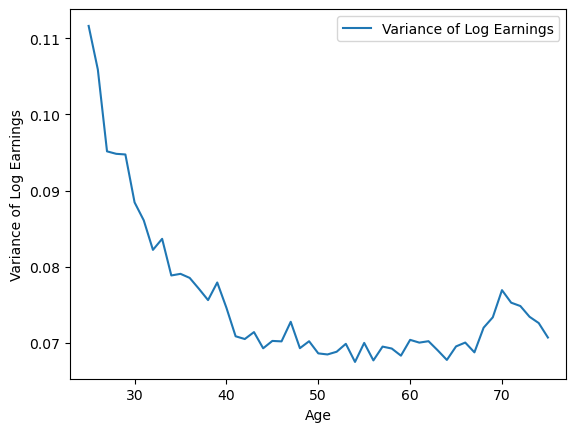

C:\Users\Ben\AppData\Local\Temp\ipykernel_21460\3651562349.py:88: RuntimeWarning: invalid value encountered in divide
  lab_earn_age_90_10_ratio = lab_earn_age_90p/lab_earn_age_10p
C:\Users\Ben\AppData\Local\Temp\ipykernel_21460\3651562349.py:93: RuntimeWarning: invalid value encountered in divide
  lab_earn_age_90_50_ratio = lab_earn_age_90p/lab_earn_age_50p
C:\Users\Ben\AppData\Local\Temp\ipykernel_21460\3651562349.py:98: RuntimeWarning: invalid value encountered in divide
  lab_earn_age_50_10_ratio = lab_earn_age_50p/lab_earn_age_10p
C:\Users\Ben\AppData\Local\Temp\ipykernel_21460\3651562349.py:103: RuntimeWarning: invalid value encountered in divide
  lab_earn_age_90_5_ratio = lab_earn_age_90p/lab_earn_by_age_5p
C:\Users\Ben\AppData\Local\Temp\ipykernel_21460\3651562349.py:108: RuntimeWarning: invalid value encountered in divide
  lab_earn_age_50_5_ratio = lab_earn_age_50p/lab_earn_by_age_5p


NameError: name 'myPars_no_cost' is not defined

In [11]:
quietly = True

fig_var_benchmark, ax_var_benchmark = plot_var_log_earn(myPars_bench, sims_bench, out_path)
[fig_90_bench, ax_90_bench, fig_50_bench, ax_50_bench, fig_10_bench, ax_10_bench, fig_5_bench, ax_5_bench,
    fig_90_10_bench, ax_90_10_bench, fig_90_50_bench, ax_90_50_bench, fig_50_10_bench, ax_50_10_bench, fig_90_5_bench, ax_90_5_bench, fig_50_5_bench, ax_50_5_bench
] = plot_lab_earn_perc(myPars_bench, sims_bench, out_path, quietly)

fig_var_no_cost, ax_var_no_cost = plot_var_log_earn(myPars_no_cost, sims_no_cost, out_path)
[fig_90_no_cost, ax_90_no_cost, fig_50_no_cost, ax_50_no_cost, fig_10_no_cost, ax_10_no_cost, fig_5_no_cost, ax_5_no_cost,
    fig_90_10_no_cost, ax_90_10_no_cost, fig_90_50_no_cost, ax_90_50_no_cost, fig_50_10_no_cost, ax_50_10_no_cost, fig_90_5_no_cost, ax_90_5_no_cost, fig_50_5_no_cost, ax_50_5_no_cost
] = plot_lab_earn_perc(myPars_no_cost, sims_no_cost, out_path, quietly)
 
tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), (fig_var_no_cost, ax_var_no_cost)], y_lim =[0.04,0.12], label_lists = [["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_90_bench, ax_90_bench), (fig_90_no_cost, ax_90_no_cost)], y_lim=[5,7], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_50_bench, ax_50_bench), (fig_50_no_cost, ax_50_no_cost)], y_lim=[5,7], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_10_bench, ax_10_bench), (fig_10_no_cost, ax_10_no_cost)], y_lim=[5,7], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_5_bench, ax_5_bench), (fig_5_no_cost, ax_5_no_cost)], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_90_10_bench, ax_90_10_bench), (fig_90_10_no_cost, ax_90_10_no_cost)], y_lim = [1.0,1.2], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_90_50_bench, ax_90_50_bench), (fig_90_50_no_cost, ax_90_50_no_cost)], y_lim = [1.0,1.2], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_50_10_bench, ax_50_10_bench), (fig_50_10_no_cost, ax_50_10_no_cost)], y_lim = [1.0,1.2], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_90_5_bench, ax_90_5_bench), (fig_90_5_no_cost, ax_90_5_no_cost)], label_lists = [["Benchmark"], ["No Cost"] ])
tb.combine_plots([(fig_50_5_bench, ax_50_5_bench), (fig_50_5_no_cost, ax_50_5_no_cost)], label_lists = [["Benchmark"], ["No Cost"] ])
                 




In [ ]:
importlib.reload(tb)
def cum_sum_by_last_dim(array: np.ndarray) -> np.ndarray:
    cum_sum = np.cumsum(array, axis=array.ndim-1)
    return cum_sum
cum_sims_bench = {key: cum_sum_by_last_dim(sims_bench[key]) for key in sims_bench}
cum_sims_no_cost = {key: cum_sum_by_last_dim(sims_no_cost[key]) for key in sims_no_cost}
for key in cum_sims_bench:
    cum_sims_bench[key] = cum_sum_by_last_dim(sims_bench[key])
    cum_sims_no_cost[key] = cum_sum_by_last_dim(sims_no_cost[key])


fig_var_cum_bench, ax_var_cum_bench = plot_var_log_earn(myPars_bench, cum_sims_bench, out_path, quietly)
fig_var_cum_no_cost, ax_var_cum_no_cost = plot_var_log_earn(myPars_no_cost, cum_sims_no_cost, out_path, quietly)
tb.combine_plots([(fig_var_cum_bench, ax_var_cum_bench), (fig_var_cum_no_cost, ax_var_cum_no_cost)], label_lists = [["Benchmark"],["No Cost"]])

[fig_90_bench, ax_90_bench, fig_50_bench, ax_50_bench, fig_10_bench, ax_10_bench, fig_5_bench, ax_5_bench, 
    fig_90_10_bench, ax_90_10_bench, fig_90_50_bench, ax_90_50_bench, fig_50_10_bench, ax_50_10_bench, 
    fig_90_5_bench, ax_90_5_bench, fig_50_5_bench, ax_50_5_bench] = plot_lab_earn_perc(myPars_bench, cum_sims_bench, out_path, quietly)

[fig_90_no_cost, ax_90_no_cost, fig_50_no_cost, ax_50_no_cost, fig_10_no_cost, ax_10_no_cost, fig_5_no_cost, ax_5_no_cost,
    fig_90_10_no_cost, ax_90_10_no_cost, fig_90_50_no_cost, ax_90_50_no_cost, fig_50_10_no_cost, ax_50_10_no_cost,
    fig_90_5_no_cost, ax_90_5_no_cost, fig_50_5_no_cost, ax_50_5_no_cost] = plot_lab_earn_perc(myPars_no_cost, cum_sims_no_cost, out_path, quietly)
 

tb.combine_plots([(fig_90_bench, ax_90_bench), (fig_90_no_cost, ax_90_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_50_bench, ax_50_bench), (fig_50_no_cost, ax_50_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_10_bench, ax_10_bench), (fig_10_no_cost, ax_10_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_5_bench, ax_5_bench), (fig_5_no_cost, ax_5_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_90_10_bench, ax_90_10_bench), (fig_90_10_no_cost, ax_90_10_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_90_50_bench, ax_90_50_bench), (fig_90_50_no_cost, ax_90_50_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_50_10_bench, ax_50_10_bench), (fig_50_10_no_cost, ax_50_10_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_90_5_bench, ax_90_5_bench), (fig_90_5_no_cost, ax_90_5_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])
tb.combine_plots([(fig_50_5_bench, ax_50_5_bench), (fig_50_5_no_cost, ax_50_5_no_cost)], label_lists =[["Benchmark"], ["No Cost"]])


In [ ]:
importlib.reload(main)
print("myPars.wH_coeff", myPars.wH_coeff)
myPars.wH_coeff = 0.0
print("myPars.wH_coeff", myPars.wH_coeff)
print("myPars.phi_H", myPars.phi_H)

myPars, myShocks, sols, sims = main.main_io(main_path, myPars=myPars, do_wH_calib = False, output_flag = False) 